In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\AbhilashKY\Downloads\8th ReportCard\otherreportcards\loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.shape

(9578, 14)

In [4]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1    7710
0    1868
Name: credit.policy, dtype: int64


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: int.rate, Length: 249, dtype: int64


317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: installment, Length: 4788, dtype: int64


11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: log.annual.inc, Length: 1987, dtype: int64


0.00     89
10.00    19
0.60     16
15.10    13
12.00    13
         ..
5.90      1
19.74     1
29

#### Creating a column called loan_approved based on the conditions 

In [8]:
def approve_loan(row):
    if row['credit.policy']==1 and row['fico'] > 680 and row['dti'] < 20 and row['int.rate'] < 0.15 and row['delinq.2yrs']<5 and row['inq.last.6mths']<5:
        return 1  # Approve loan
    else:
        return 0  
df['loan_approved'] = df.apply(approve_loan, axis=1)

In [9]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,loan_approved
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0


In [10]:
df.shape

(9578, 15)

### Data Description

#### credit.policy:
Indicates whether the loan applicant meets the lending criteria set by the lender. This is often a binary variable where 1 means the applicant meets the credit policy, and 0 means they do not.

#### purpose:
The purpose of the loan, such as debt consolidation, home improvement, major purchase, etc. This is a categorical variable that describes why the applicant is requesting the loan.

#### int.rate:
The interest rate charged on the loan, expressed as a decimal. For example, an interest rate of 15% would be represented as 0.15.

#### installment:
The monthly payment that the borrower needs to make to repay the loan. It includes both principal and interest.

#### log.annual.inc:
The natural logarithm of the annual income of the borrower. Using the logarithm helps in normalizing the income data and managing large variations.

#### dti (Debt-to-Income ratio):
A measure of the borrower’s monthly debt payments divided by their monthly gross income. It helps in assessing the borrower’s ability to manage monthly payments and repay debts.

#### fico:
The borrower’s FICO credit score, which ranges typically from 300 to 850. It is a measure of the borrower’s creditworthiness.

#### days.with.cr.line:
The number of days the borrower has had a credit line. This is a measure of the length of the borrower’s credit history.

#### revol.bal (Revolving balance):
The amount of money owed by the borrower on revolving credit accounts, such as credit cards.

#### revol.util (Revolving line utilization rate):
The ratio of the borrower’s revolving balance to their credit limit, expressed as a percentage. It measures how much of the available credit is being used by the borrower.

#### inq.last.6mths:
The number of inquiries made into the borrower’s credit report by lenders in the last 6 months. Multiple inquiries can indicate a higher risk as it might suggest the borrower is seeking multiple lines of credit.

#### delinq.2yrs:
The number of times the borrower has been 30 or more days past due on a payment in the past 2 years.

#### pub.rec (Public records):
The number of derogatory public records (e.g., bankruptcies, tax liens, or judgments) associated with the borrower’s credit history.

#### not.fully.paid:
Indicates whether the borrower has not fully paid back the loan. This is often a binary variable where 1 means the loan was not fully paid, and 0 means it was fully paid.

#### loan_approved: 
Indicates whether the loan has been approved or not based on the above criteries. This is binaru variable where 1 being loan has been approved and 0 being loan is not approved

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
 14  loan_approved      9578 non-null   int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 1.1+ MB


From the above brief summary, the observations are:

    1. There are no null values
    2. There are three types of datatypes int64(6), float64(8) and object(1)
    3. Memory usage info is also given.
    4. Annual income is converted into log values inorder to get normalised values.

In [12]:
# data distribution(assuming 'loan_approved' column as target variable)
df['loan_approved'].value_counts()

1    5184
0    4394
Name: loan_approved, dtype: int64

<AxesSubplot:>

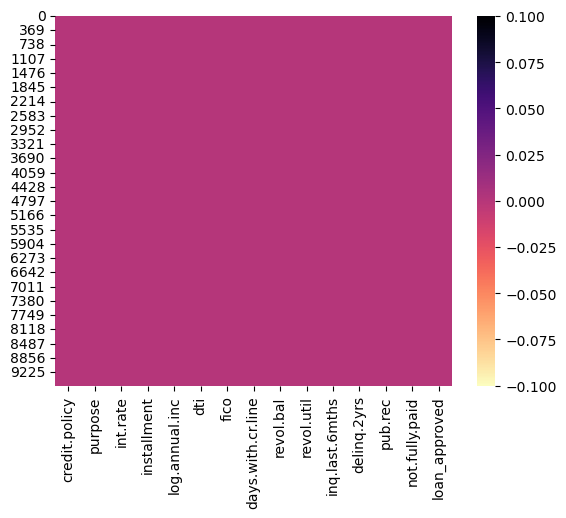

In [13]:
sns.heatmap(df.isnull(), cmap = 'magma_r')

In [14]:
#checking no of unique values in each column
df.nunique().to_frame("No of unique values")

,No of unique values
credit.policy,2
purpose,7
int.rate,249
installment,4788
log.annual.inc,1987
dti,2529
fico,44
days.with.cr.line,2687
revol.bal,7869
revol.util,1035


In [15]:
cont = df[['int.rate','installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util']]

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['purpose']=le.fit_transform(df['purpose'])
df['purpose'].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

debt_consolidation    3957 -->2

all_other             2331 -->0

credit_card           1262 -->1

home_improvement       629 -->4

small_business         619 -->6

major_purchase         437 -->5

educational            343 -->3

In [18]:
#Statistical summary of the dataset
df.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,loan_approved
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.541240
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.498322
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000


Observations:
    
    1. The mean value is more than median of the column installment so we can say that data is skewed.
    2. There is huge differnec between the third quartile and max value of the column days.with.crline, revol.bal. So we can say that outliers exist in these columns
    3. there are No null values or missing values
    

### Data Visualisatioin

#### Univariate Analysis

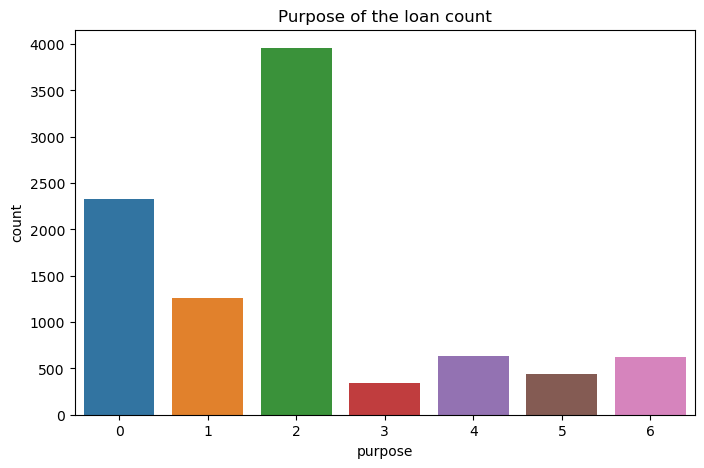

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(df['purpose'], data = df)
plt.title('Purpose of the loan count')
plt.show()

Observation:
    Most of the loans given was for debt cnsolidation and least being  education loan

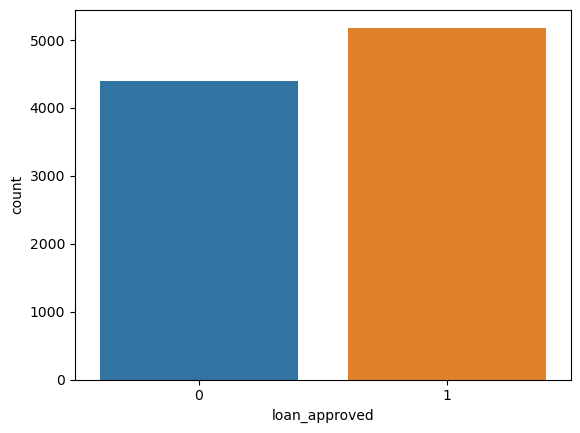

In [20]:
sns.countplot(df['loan_approved'],data = df)
plt.show()

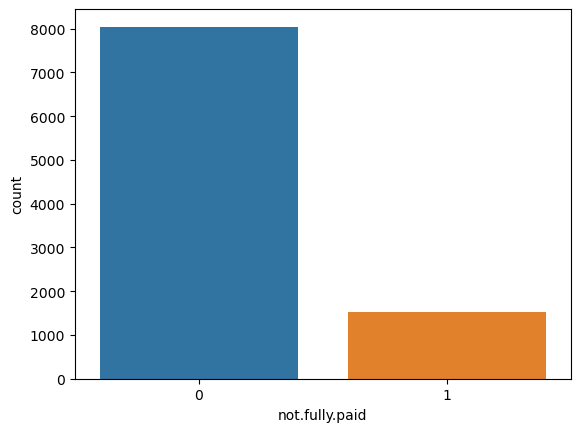

In [21]:
sns.countplot(df['not.fully.paid'],data = df)
plt.show()

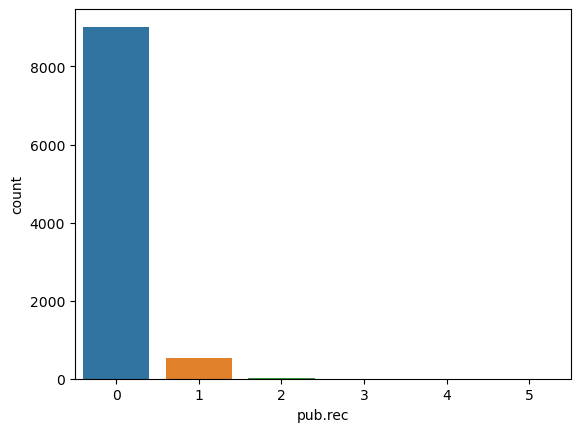

In [22]:
sns.countplot(df['pub.rec'],data = df)
plt.show()

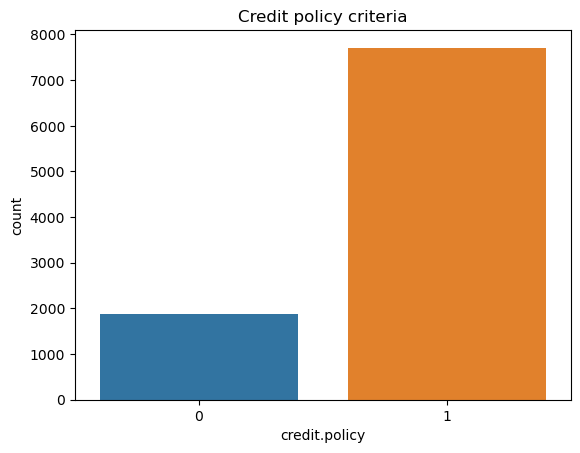

In [23]:
sns.countplot(df['credit.policy'],data = df)
plt.title('Credit policy criteria')
plt.show()

Observation:
    
    Most of the customers meet credit policy

#### Bivariate analysis

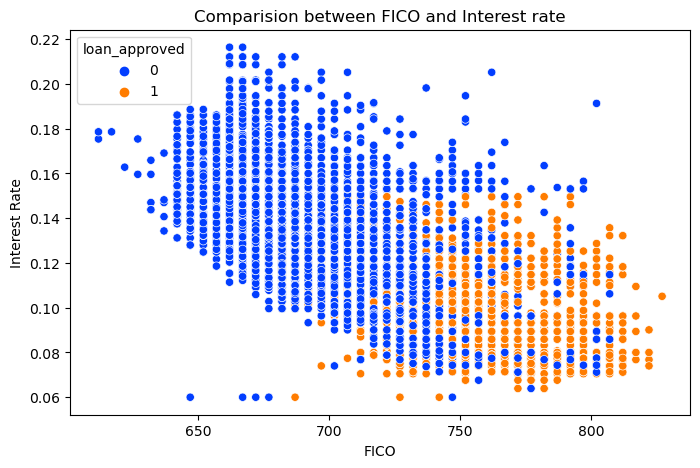

In [24]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'fico',y = 'int.rate', hue = 'loan_approved', data=df, palette = 'bright')
plt.title('Comparision between FICO and Interest rate')
plt.xlabel('FICO')
plt.ylabel('Interest Rate')
plt.show()

Observation:

    The trend shows that these two are negatively co relate i'e if the FICO score increases the interest rate decreases. And the approvall of loan is also higher if the fico is greater 750 and even though the score is low if the lower interest rate is low the loan gets approved

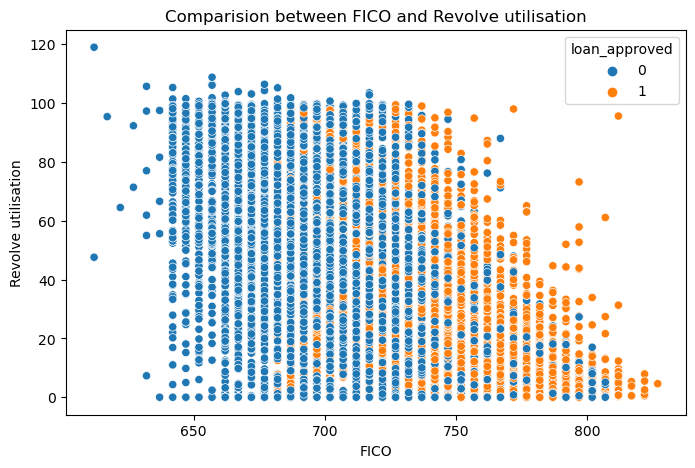

In [25]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'fico',y = 'revol.util',hue = 'loan_approved', data=df)
plt.title('Comparision between FICO and Revolve utilisation')
plt.xlabel('FICO')
plt.ylabel('Revolve utilisation')
plt.show()

Observation:
    From the aboove we can see the trend if the score is more than 750 the utilisation of the loan amount is less. In the other words they have not taken any loans as of now. And we can also see that most of the loans got approved if the fico >720

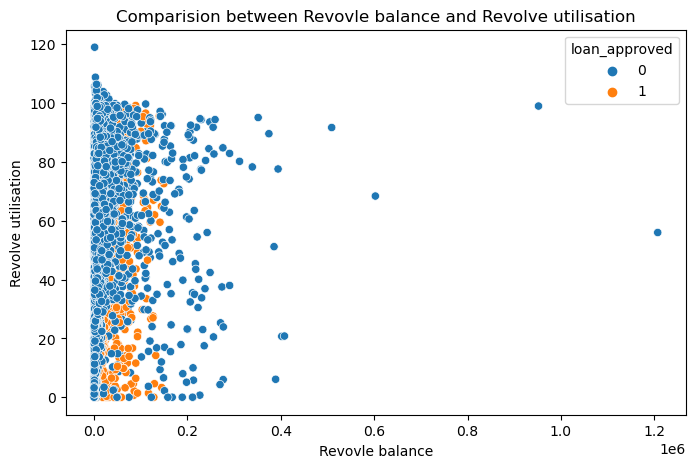

In [26]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'revol.bal',y = 'revol.util',hue = 'loan_approved', data=df)
plt.title('Comparision between Revovle balance and Revolve utilisation')
plt.xlabel('Revovle balance')
plt.ylabel('Revolve utilisation')
plt.show()

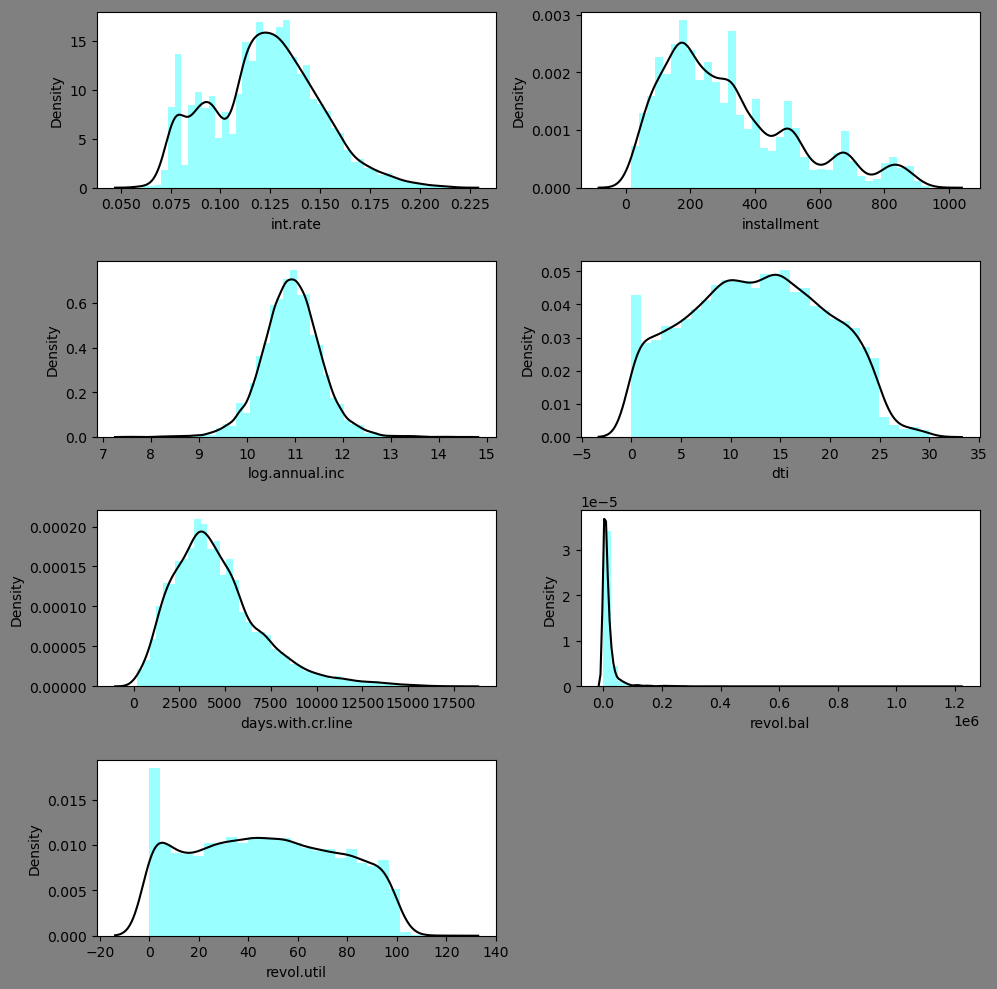

In [27]:
plt.figure(figsize = (10,10), facecolor = 'grey')
count = 1
for i in cont:
    if count<8:
        ax = plt.subplot(4,2, count)
        sns.distplot(df[i], color = 'cyan', kde = True,kde_kws = {'color':'black'})
        plt.xlabel(i, fontsize = 10)
    count+=1
plt.tight_layout()

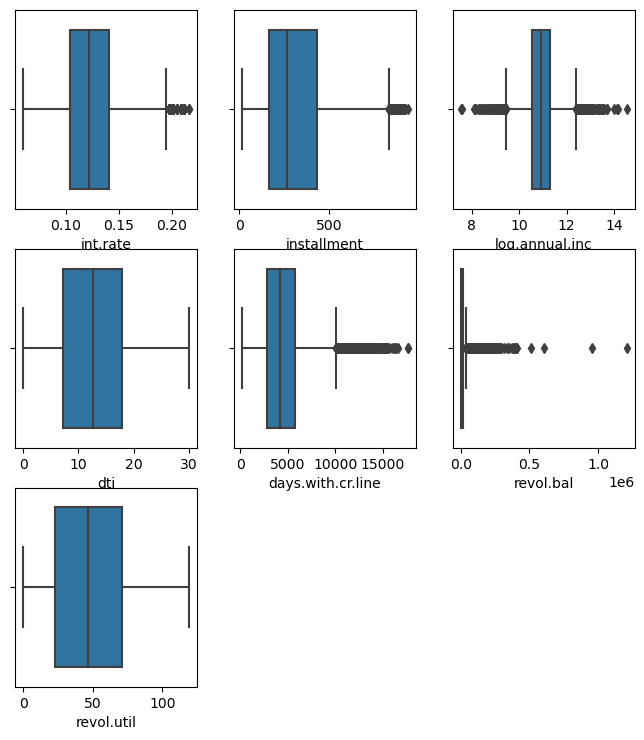

In [28]:
plt.figure(figsize = (8,15))
c = 1
for i in cont:
    if c<16:
        ax = plt.subplot(5,3,c)
        sns.boxplot(df[i], data = df)
        plt.xlabel(i)
    c+=1
plt.show()

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(cont))
z

,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util
0,0.139318,2.463099,0.680388,0.998505,0.432230,0.353732,0.182704
1,0.578868,0.438854,0.244031,0.244540,0.721230,0.495018,1.030602
2,0.486484,0.230708,0.908659,0.141885,0.059770,0.397073,0.730683
3,0.813544,0.757022,0.680388,0.654697,0.745277,0.496321,0.909966
4,0.743509,1.043992,0.597961,0.343326,0.198161,0.360663,0.251586
...,...,...,...,...,...,...,...
9573,0.873884,0.123976,2.031030,0.322023,2.368325,5.879467,1.216726
9574,0.099083,0.296481,0.341170,1.800898,0.072400,0.495638,1.575135
9575,0.578868,1.068670,0.545694,0.070213,0.444860,0.203765,1.244300
9576,1.391660,0.156914,0.182730,0.954924,1.105722,0.501089,1.502753


In [30]:
# removing the data  above zscore and creating new dataframe
df1 = df[(z<3).all(axis=1)]
df1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,loan_approved
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,2,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0


In [31]:
#Checking for the data loss percentage which should not exceed 10% of the original data
print("The percentage loss of the data : ", ((df.shape[0]-df1.shape[0])/df.shape[0])*100,"%")

The percentage loss of the data :  4.03006890791397 %


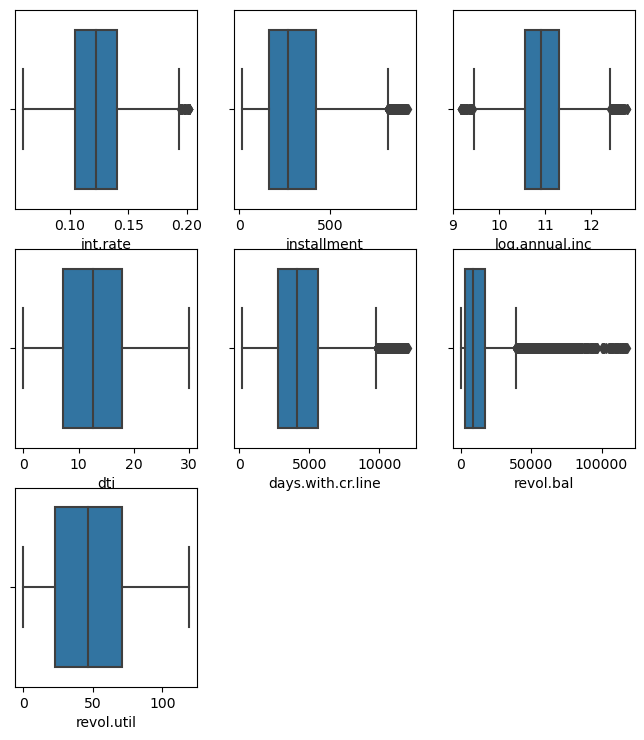

In [32]:
plt.figure(figsize = (8,15))
c = 1
for i in cont:
    if c<16:
        ax = plt.subplot(5,3,c)
        sns.boxplot(df1[i], data = df)
        plt.xlabel(i)
    c+=1
plt.show()

In [33]:
df1.skew()

credit.policy       -1.642878
purpose              0.910206
int.rate             0.101786
installment          0.926712
log.annual.inc      -0.036918
dti                  0.024567
fico                 0.474607
days.with.cr.line    0.778370
revol.bal            2.606979
revol.util           0.057216
inq.last.6mths       3.650215
delinq.2yrs          6.148519
pub.rec              5.090813
not.fully.paid       1.877108
loan_approved       -0.195034
dtype: float64

Skewness

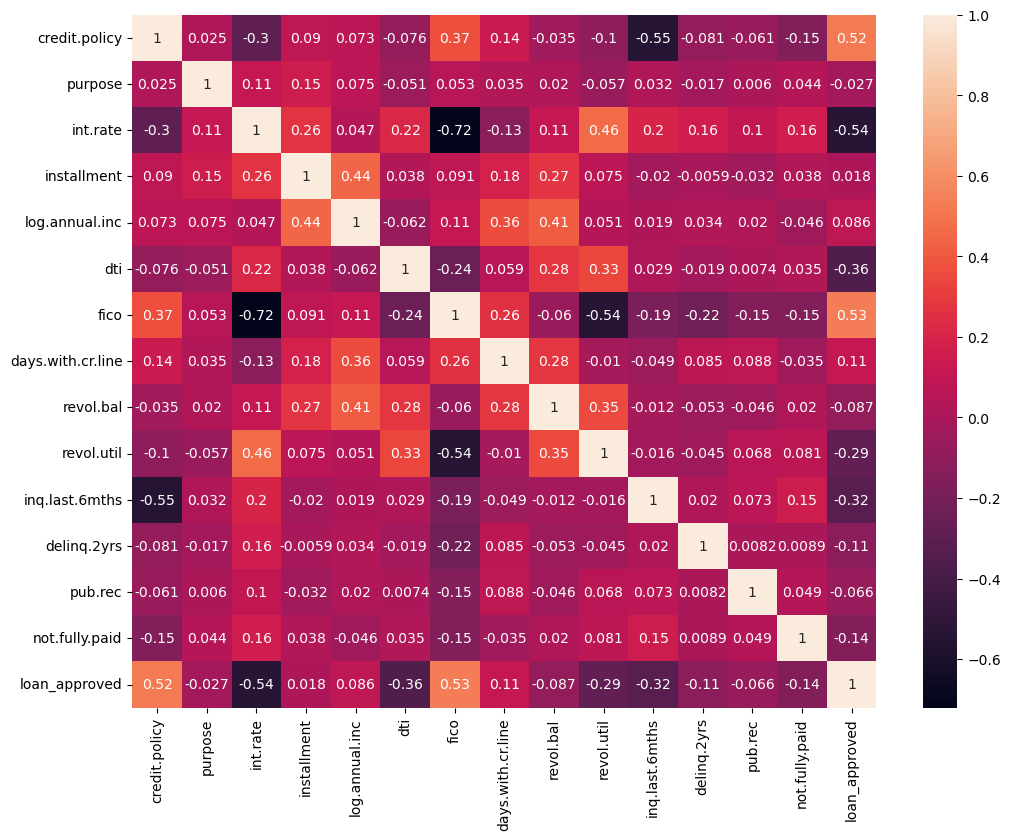

In [34]:
plt.figure(figsize = (12,9))
sns.heatmap(df1.corr(), annot = True, fmt = '.2g')
plt.show()

In [35]:
df1.corr().loan_approved.sort_values()

int.rate            -0.535648
dti                 -0.357907
inq.last.6mths      -0.321189
revol.util          -0.289592
not.fully.paid      -0.142644
delinq.2yrs         -0.109274
revol.bal           -0.086972
pub.rec             -0.065795
purpose             -0.026791
installment          0.017507
log.annual.inc       0.086297
days.with.cr.line    0.113678
credit.policy        0.521070
fico                 0.534613
loan_approved        1.000000
Name: loan_approved, dtype: float64

In [36]:
#Feature Selection
X = df1.drop('loan_approved', axis =1)
y = df1['loan_approved']
print(X.shape)
print(y.shape)

(9192, 14)
(9192,)


In [37]:
#Selecting best features
from sklearn.feature_selection import SelectKBest, f_classif
best = SelectKBest(score_func=f_classif, k = 6)
fit =best.fit(X,y)

In [38]:
df1_scores = pd.DataFrame(fit.scores_)
df1_columns = pd.DataFrame(X.columns)
feat = pd.concat([df1_columns,df1_scores], axis=1)
feat.columns = ['Feature name', 'Score']
feat.nlargest(6,'Score')

,Feature name,Score
2,int.rate,3697.727451
6,fico,3677.745627
0,credit.policy,3425.202780
5,dti,1350.167845
10,inq.last.6mths,1057.116140
9,revol.util,841.256721


These are the best features to predict the target variable. We need to create new features dataframe now

In [39]:
new_x = df1[['int.rate','fico','credit.policy','dti','inq.last.6mths','revol.util']]

In [40]:
new_x.head()

,int.rate,fico,credit.policy,dti,inq.last.6mths,revol.util
0,0.1189,737,1,19.48,0,52.1
1,0.1071,707,1,14.29,0,76.7
2,0.1357,682,1,11.63,1,25.6
3,0.1008,712,1,8.10,1,73.2
4,0.1426,667,1,14.97,0,39.5


In [41]:
new_x.describe()

,int.rate,fico,credit.policy,dti,inq.last.6mths,revol.util
count,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000
mean,0.122527,710.445387,0.817341,12.596440,1.568973,46.849036
std,0.026423,37.730086,0.386408,6.844057,2.192962,28.914868
min,0.060000,612.000000,0.000000,0.000000,0.000000,0.000000
25%,0.103900,682.000000,1.000000,7.250000,0.000000,22.800000
50%,0.122100,707.000000,1.000000,12.640000,1.000000,46.400000
75%,0.139900,737.000000,1.000000,17.900000,2.000000,70.800000
max,0.201700,827.000000,1.000000,29.950000,33.000000,119.000000


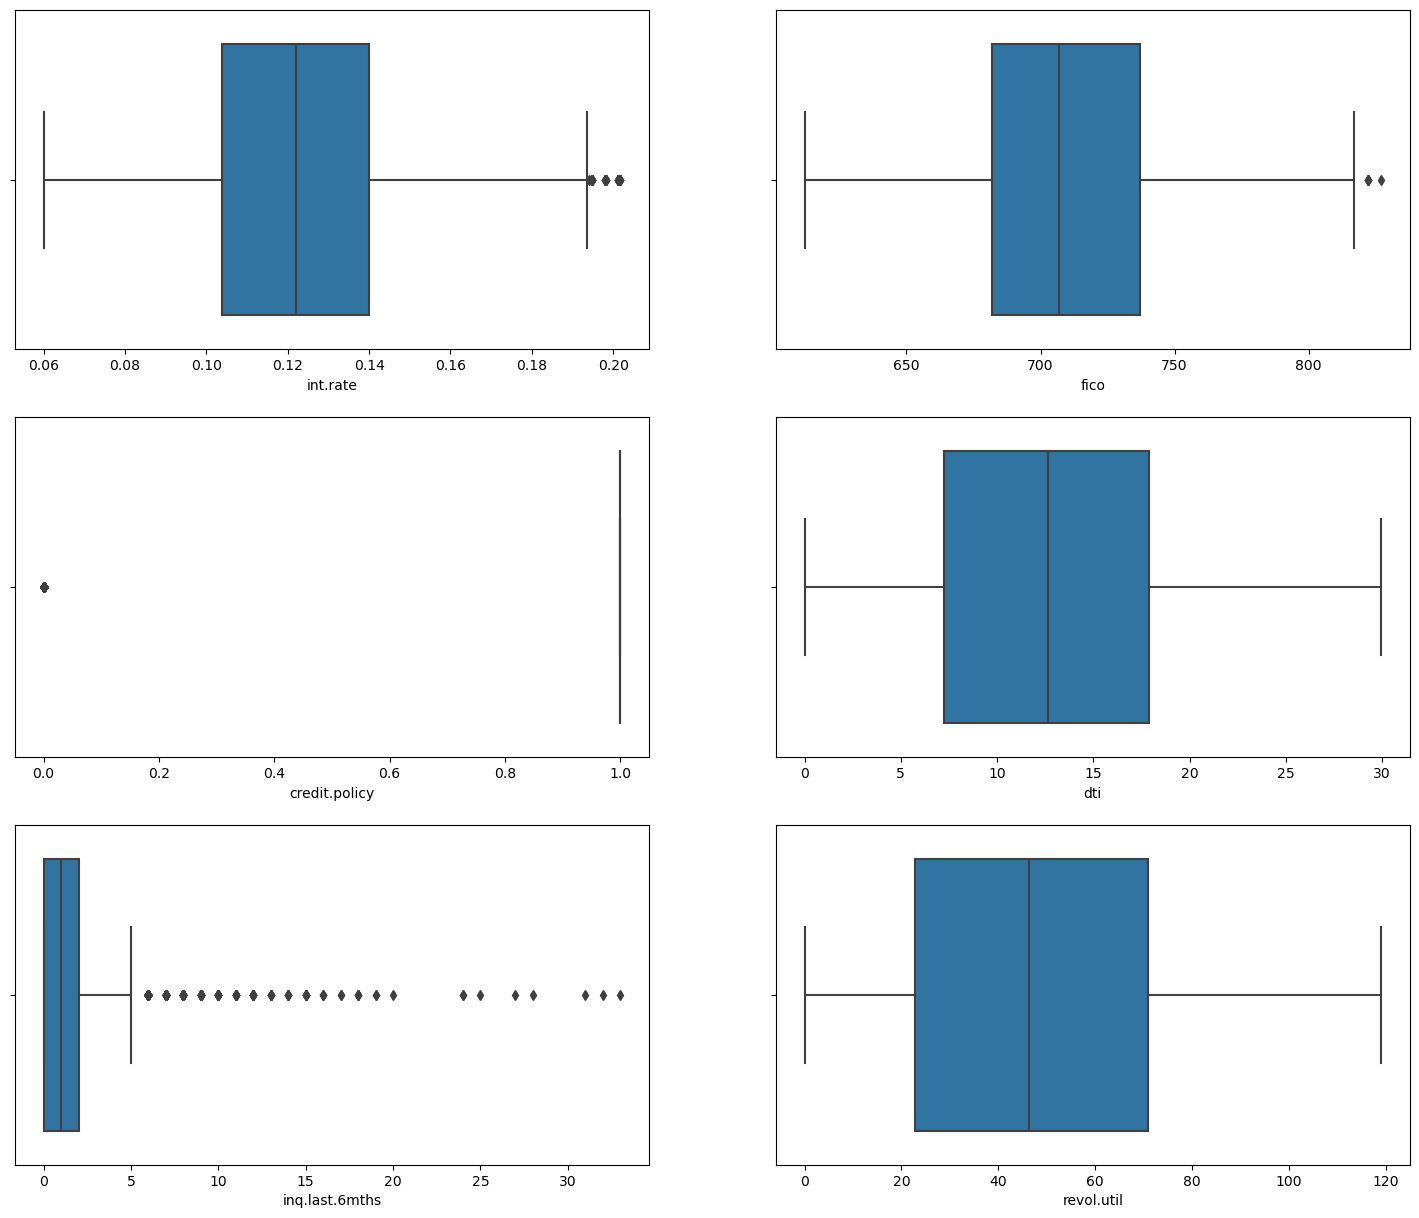

In [42]:
plt.figure(figsize = (18,15))
c = 1
for i in new_x:
    if c<7:
        ax = plt.subplot(3,2,c)
        sns.boxplot(df1[i], data = df)
        plt.xlabel(i)
    c+=1
plt.show()

In [43]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(new_x)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(new_x.values,i)
    for i in range(len(new_x.columns))]
vif["Features"] = new_x.columns
vif

,VIF values,Features
0,24.980262,int.rate
1,31.072723,fico
2,8.690340,credit.policy
3,4.957341,dti
4,2.207331,inq.last.6mths
5,5.154357,revol.util


#### OverSampling

In [45]:

from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(new_x,y)

In [46]:
#checking value counts after oversampling
y.value_counts()

1    5042
0    5042
Name: loan_approved, dtype: int64

Now the data is balanced, we can build the machine learning classification models

#### Hold Out splitting

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(100,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    accu = accuracy_score(y_test, pred)
    if accu>maxAccu:
        maxAccu = accu
        maxRs =i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 1.0 at random_state 131


In [48]:
#Creating train test split at maxRs
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [49]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import  cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [50]:
def metric_score(clf,x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n--Train Result--')
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100 :.2f}%")
    elif train == False:
        pred = clf.predict(x_test)
        print('\n--Test result--')
        print(f"Accuracy Score:{accuracy_score(y_test, pred)*100 :.2f}%")
        
        print('\n \n Classification Report\n', classification_report(y_test,pred, digits = 2))
        
        print('\n ******Cross Validation******\n')
        score = cross_val_score(clf,x,y)
        print("Scores:", score)
        print("Mean of scores:", score.mean())
        print("Difference between Accuracy Score and cross validation score is - ",abs(accuracy_score(y_test, pred)-score.mean()))

#### 1.Logistic Regresion

In [51]:
ls = LogisticRegression()
ls.fit(x_train,y_train)
#Call the function and pass the dataset to check train and test result
metric_score(ls,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(ls,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:85.15%

--Test result--
Accuracy Score:83.31%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1527
           1       0.81      0.86      0.84      1499

    accuracy                           0.83      3026
   macro avg       0.83      0.83      0.83      3026
weighted avg       0.83      0.83      0.83      3026


 ******Cross Validation******

Scores: [0.79176996 0.77491324 0.85176004 0.91323748 0.86755952]
Mean of scores: 0.8398480475482211
Difference between Accuracy Score and cross validation score is -  0.0067350270591265415


#### 2. Support Vector Machine Cclassifier

In [52]:
svc = SVC()
svc.fit(x_train,y_train)
#Call the function and pass the dataset to check train and test result
metric_score(svc,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(svc,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:75.66%

--Test result--
Accuracy Score:73.46%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1527
           1       0.74      0.72      0.73      1499

    accuracy                           0.73      3026
   macro avg       0.73      0.73      0.73      3026
weighted avg       0.73      0.73      0.73      3026


 ******Cross Validation******

Scores: [0.74020823 0.7307883  0.76400595 0.75756073 0.75049603]
Mean of scores: 0.7486118488876297
Difference between Accuracy Score and cross validation score is -  0.013978669773287322


#### 3.KNN Classifier

In [53]:
#Instantiate KNNClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
#Call the function and pass the dataset to check train and test result
metric_score(knn,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(knn,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:92.31%

--Test result--
Accuracy Score:87.64%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.93      0.82      0.87      1527
           1       0.83      0.94      0.88      1499

    accuracy                           0.88      3026
   macro avg       0.88      0.88      0.88      3026
weighted avg       0.88      0.88      0.88      3026


 ******Cross Validation******

Scores: [0.91075855 0.87902826 0.88894398 0.82697075 0.89831349]
Mean of scores: 0.8808030057999071
Difference between Accuracy Score and cross validation score is -  0.00439851141788461


#### 4. RandomForest Classifier

In [54]:
rs = RandomForestClassifier()
rs.fit(x_train,y_train)

metric_score(rs,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(rs,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:100.00%

--Test result--
Accuracy Score:100.00%

 
 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       1.00      1.00      1.00      1499

    accuracy                           1.00      3026
   macro avg       1.00      1.00      1.00      3026
weighted avg       1.00      1.00      1.00      3026


 ******Cross Validation******

Scores: [1.         0.99950421 0.99950421 1.         0.99603175]
Mean of scores: 0.999008034878139
Difference between Accuracy Score and cross validation score is -  0.0009919651218609493


#### 5. Gradient Classifier

In [55]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
metric_score(gd,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(gd,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:99.91%

--Test result--
Accuracy Score:99.97%

 
 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       1.00      1.00      1.00      1499

    accuracy                           1.00      3026
   macro avg       1.00      1.00      1.00      3026
weighted avg       1.00      1.00      1.00      3026


 ******Cross Validation******

Scores: [1.         0.99950421 1.         1.         0.99603175]
Mean of scores: 0.9991071920422442
Difference between Accuracy Score and cross validation score is -  0.0005623386913975459


#### 6. AdaBoost Classifier

In [56]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
metric_score(ad,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(ad,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:99.99%

--Test result--
Accuracy Score:100.00%

 
 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       1.00      1.00      1.00      1499

    accuracy                           1.00      3026
   macro avg       1.00      1.00      1.00      3026
weighted avg       1.00      1.00      1.00      3026


 ******Cross Validation******

Scores: [1.         0.99950421 1.         0.99950421 0.99603175]
Mean of scores: 0.999008034878139
Difference between Accuracy Score and cross validation score is -  0.0009919651218609493


#### 7.Bagging Classifier

In [57]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)
metric_score(bg,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(bg,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:99.99%

--Test result--
Accuracy Score:100.00%

 
 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       1.00      1.00      1.00      1499

    accuracy                           1.00      3026
   macro avg       1.00      1.00      1.00      3026
weighted avg       1.00      1.00      1.00      3026


 ******Cross Validation******

Scores: [0.99950421 0.99950421 0.99950421 0.99950421 0.99603175]
Mean of scores: 0.9988097205499287
Difference between Accuracy Score and cross validation score is -  0.0011902794500713298


#### 8. Extratrees Classifier

In [58]:
ex = ExtraTreesClassifier()
ex.fit(x_train,y_train)
metric_score(ex,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(ex,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:100.00%

--Test result--
Accuracy Score:99.47%

 
 Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1527
           1       0.99      1.00      0.99      1499

    accuracy                           0.99      3026
   macro avg       0.99      0.99      0.99      3026
weighted avg       0.99      0.99      0.99      3026


 ******Cross Validation******

Scores: [0.98909271 0.99058007 0.99702529 0.99008428 0.99553571]
Mean of scores: 0.9924636128621007
Difference between Accuracy Score and cross validation score is -  0.002248878876167648


### Cross Validation
By evaluating the cross validation scores for all the classification algorithm we conclude that Random Forest Classifier is the best algorithm since the differnece between accuracy score and validation score is least

#### Hyper Parameter Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV as rcv

In [60]:
param = {
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':range(5,15),
    'n_estimators' :range(1,5),
    'max_depth':range(10,20),
    'min_samples_split':range(10,15)
    
}

In [62]:
rn_search = rcv(RandomForestClassifier(), cv = 5,param_distributions = param)

In [63]:
rn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(10, 20),
                                        'min_samples_leaf': range(5, 15),
                                        'min_samples_split': range(10, 15),
                                        'n_estimators': range(1, 5)})

In [64]:
rn_clf = rn_search.best_estimator_

In [65]:
rn_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=4)

In [66]:
metric_score(rn_clf,x_train,x_test,y_train,y_test, train = True) # For training result

metric_score(rn_clf,x_train,x_test,y_train,y_test, train = False) # For testing result


--Train Result--
Accuracy Score:99.87%

--Test result--
Accuracy Score:100.00%

 
 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       1.00      1.00      1.00      1499

    accuracy                           1.00      3026
   macro avg       1.00      1.00      1.00      3026
weighted avg       1.00      1.00      1.00      3026


 ******Cross Validation******

Scores: [1.         0.99950421 0.99900843 1.         0.99603175]
Mean of scores: 0.9989088777140338
Difference between Accuracy Score and cross validation score is -  0.001091122285966195


In [67]:
from sklearn.metrics import roc_auc_score, roc_curve # Importing libraries to build roc curve and roc_auc_score
from sklearn.metrics import plot_roc_curve # Plotting roc_curve

In [68]:
#All the models score Captured
ls.score(x_test,y_test)
svc.score(x_test,y_test)
ad.score(x_test,y_test)
knn.score(x_test,y_test)
rs.score(x_test,y_test)
gd.score(x_test,y_test)
bg.score(x_test,y_test)
ex.score(x_test,y_test)
print('All the models score captured')

All the models score captured


#### ROC AUC Curve for the fitted model

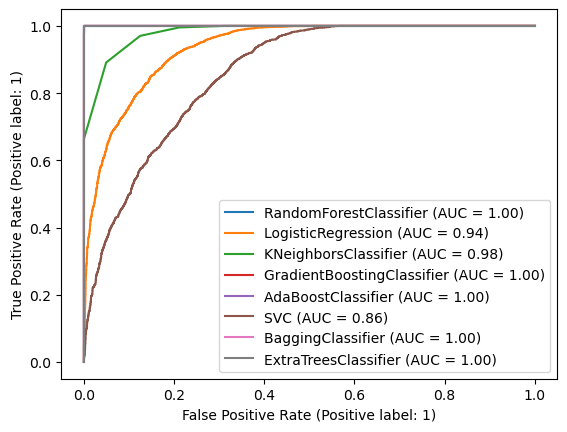

In [69]:
#Plotting the roc_curve for all the models. Here we are capturing each model's confusion matrix data. disp.ax_ is nothing but plotting the curve comparing to decisiontreeclassifier decision tree confusion matrix an
disp = plot_roc_curve(rs,x_train,y_train)
plot_roc_curve(ls,x_train,y_train,ax = disp.ax_)

plot_roc_curve(knn,x_train,y_train,ax = disp.ax_)

plot_roc_curve(gd,x_train,y_train,ax = disp.ax_)

plot_roc_curve(ad,x_train,y_train,ax = disp.ax_)

plot_roc_curve(svc,x_train,y_train,ax = disp.ax_)

plot_roc_curve(bg,x_train,y_train,ax = disp.ax_)

plot_roc_curve(ex,x_train,y_train,ax = disp.ax_)

plt.legend(prop={'size':10},loc = 'lower right')

plt.show()

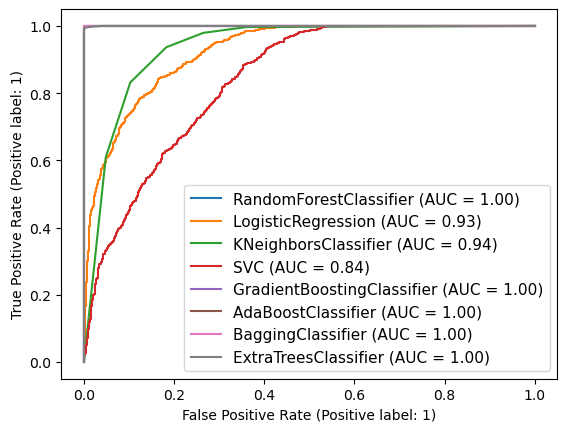

In [70]:
disp = plot_roc_curve(rs,x_test,y_test)
plot_roc_curve(ls,x_test,y_test,ax = disp.ax_)

plot_roc_curve(knn,x_test,y_test,ax = disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax = disp.ax_)

plot_roc_curve(gd,x_test,y_test,ax = disp.ax_)

plot_roc_curve(ad,x_test,y_test,ax = disp.ax_)

plot_roc_curve(bg,x_test,y_test,ax = disp.ax_)

plot_roc_curve(ex,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':11},loc = 'lower right')

plt.show()

In [71]:
#saving the model using .pkl
import joblib
joblib.dump(rn_clf,"loan_fraud_detection.joblib")


['loan_fraud_detection.joblib']

In [72]:
#predicting the saved model
model = joblib.load("loan_fraud_detection.joblib")

#prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [73]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a

In [74]:
data

,Predicted,Original
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
3021,1,1
3022,1,1
3023,1,1
3024,0,0


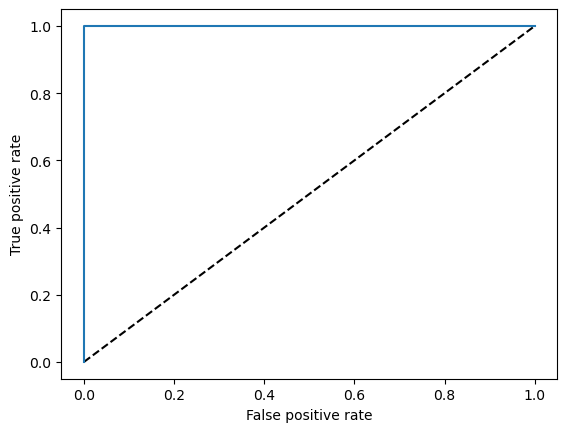

Auc score: 
 1.0


In [75]:
from sklearn.metrics import auc
y_pred_prob = rn_clf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label = 'Random Classifier(area=%0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test,rn_clf.predict(x_test))
print('Auc score:','\n', auc_score)

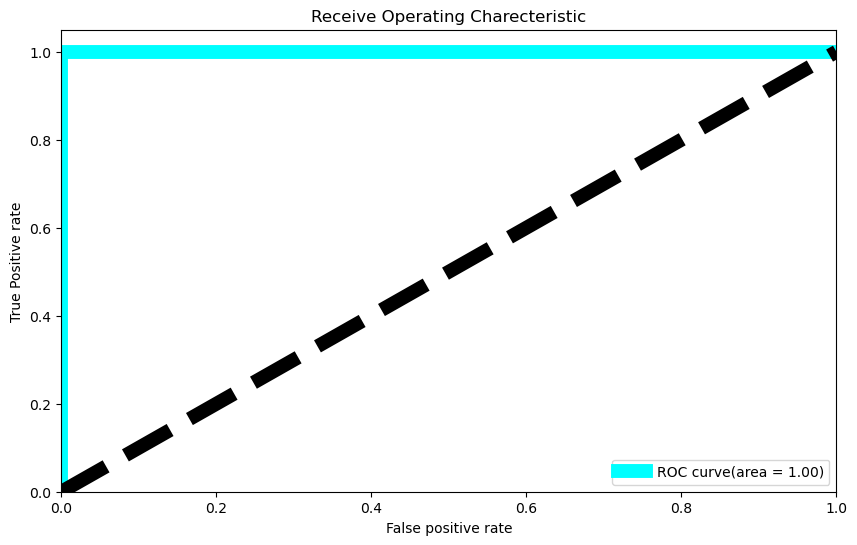

In [76]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (10,6))
plt.plot(fpr,tpr, color = 'cyan', lw = 10, label = 'ROC curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'black',lw = 10, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True Positive rate")
plt.title("Receive Operating Charecteristic")
plt.legend(loc = "lower right")
plt.show()